# Algoritmo de Grover


Annelyelthon Ferreira Alves  
Eder Lucena Andrade da Fonseca  
Universidade Federal Rural de Pernambuco  

## Introdução

Este Algoritmo versa sobre a busca de um elemento desconhecido em uma lista desordenada de elementos. Dada uma lista qualquer contendo $n$ elementos, uma busca clássica pela lista, no pior dos casos, ocasionaria na consulta de todos os elementos da lista. Isto teria um custo linear $O(n)$. O algoritmo de grover permite um ganho resolvendo este problema com custo $O(\sqrt{n})$. O algoritmo recebe uma função como estrada, que é escrita da seguinte forma:   
$f:${0,1}$^n$ $\rightarrow$ {0,1}

$f(x) = 1$, se $x =$  elemento desejado.  
$f(x) = 0$, se $x \ne$  elemento desejado.  

A entrada em algoritmos quânticos. A forma matricial de uma função para este algoritmo é dada pela seguinte regra:  
$U_f|x,y\rangle = |x,y \oplus f(x)\rangle$

---
exemplo de matriz: para um $n = 2$, ou seja, teremos uma entrada de $f:${0,1}$^2$ $\rightarrow$ {0,1}. Desejamos buscar o elemento $x = 11$.

$U_f|00,0\rangle = |00, 0 \oplus f(00)\rangle = |00, 0 \oplus 0\rangle = |000\rangle$  
$U_f|00,1\rangle = |00, 1 \oplus f(00)\rangle = |00, 1 \oplus 0\rangle = |001\rangle$  
$U_f|01,0\rangle = |01, 0 \oplus f(01)\rangle = |01, 0 \oplus 0\rangle = |010\rangle$  
$U_f|01,0\rangle = |01, 1 \oplus f(01)\rangle = |01, 1 \oplus 0\rangle = |011\rangle$  
$U_f|10,0\rangle = |10, 0 \oplus f(10)\rangle = |10, 0 \oplus 0\rangle = |100\rangle$  
$U_f|10,1\rangle = |10, 1 \oplus f(10)\rangle = |10, 1 \oplus 0\rangle = |101\rangle$  
$U_f|11,0\rangle = |11, 0 \oplus f(11)\rangle = |11, 0 \oplus 1\rangle = |111\rangle$  
$U_f|11,1\rangle = |11, 1 \oplus f(11)\rangle = |11, 1 \oplus 1\rangle = |110\rangle$  

$$U_f =\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
\end{bmatrix}$$


## Algoritmo Clássico

Poderíamos implentar o algoritmo clássico num computador quântico colocando todas as entradas da função em superposição. Desta forma todas as entradas seriam computadas quanticamente. Durante a medição não teríamos ganho algum, uma vez que o custo da busca dos elementos da função permaneceria linear $O(n)$.

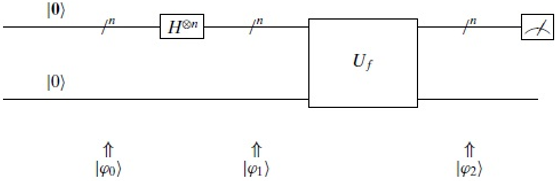

## Algoritmo Quântico

Para termos ganho computacional, devemos utilizar estratégias diferentes que deixem a etapa da medição mais rápida. Para isto utilizamos dois truques no algoritmo de grover: Inversão por fase e a inversão pela média.

#### Inversão de fase

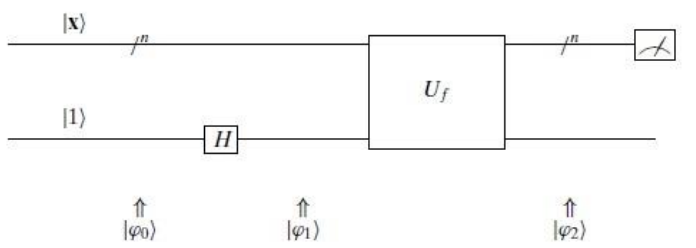


A inversão de fase é representada no início do circuito, denotado pelo hadamard kat 1 $(H|1\rangle)$. Utilizamos este conceito para mudar a fase apenas do elemento que desejamos buscar. Por exemplo: 

Desejamos buscar o terceiro elemento da matriz.  


$$Antes = \begin{bmatrix}
10 & 10 & 10 & 10\\
\end{bmatrix}^T$$

$$Depois = \begin{bmatrix}
10 & 10 & -10 & 10\\
\end{bmatrix}^T$$

Porém apenas esta operação não solucionará o problema, uma vez que estes valores da matriz representam a amplitude de probabilidade do qubit. Ao medir cada uma delas temos que:

$|+10|^2 = 100$   
$|-10|^2 = 100$  

Durante a medição da probabilidade, perderemos a informação da entrada na qual o valor desejado está indicado.

#### Inversão pela média

Para evitar a perda da informação durante a medição utilizamos este outro conceito. Após a inversão de média utilizamos a inversão pela média para garantir que durante a operação de medição o dado não se perca. Este conceito funciona da seguinte forma: Temos uma lista de elementos, tiramos a média entre eles e atribuimos o valor correspondente a cada entrada como a distância oposta ao valor com relação a média.

---
##### Exemplo: 
Considere a seguinte sequência com média $a = 32$.
$$V = \begin{bmatrix}
12 & 33 & 15 & 46 & 54\\
\end{bmatrix}^T$$

Precisamos inverter cada elemento da média, para isto, precisamos subtrair o elemento da média e somar outra a média. Em outras palavras, podemos fazer $V’ = 2a - V$
Onde $V$ é o elemento da sequência, $V’$ é o elemento da nova sequência e $a$ é a média.

$V’ = 2a – V$   
$V’ = 2\times32 – 12 = 52$   
$V’ = 2\times32 – 33 = 31$   					
$V’ = 2\times32 – 15 = 49$   				
$V’ = 2\times32 – 46 = 18$   
$V’ = 2\times32 – 54 = 10$ 

$$V’ = \begin{bmatrix}
52 & 31 & 49 & 18 & 10\\
\end{bmatrix}^T$$

---
A entrada do algoritmo é uma função de strings binárias. Sua execução depende do tamanho das strings, pois este algoritmo busca o dado desejado por apoximação. Desta forma, para ter um resultado preciso, executamos o algoritmo $\sqrt{2^n}$ vezes (consideramos apenas a parte inteira do valor) e a cada execução nos aproximamos mais do valor. Caso executemos mais do que o necessário poderemos perder a informação do dado desejado.
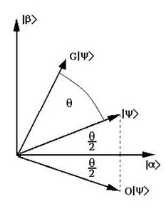

---

##### Exemplo:

Dado um vetor [5, 5, 5, 5, 5]$^T$. Queremos encontrar o terceiro elemento do vetor.
Primeiramente, vamos inverter a fase para o quarto número e teremos 
[5, 5, -5, 5, 5]$^T$. Em seguida, tiramos a média, que é igual a $3$. Chamaremos $a = 3$.
Após isto, calculamos a inversão sobre a média e teremos $(2a - v)$[5, 5, -5, 5, 5]$^T$ =
$(6 - v)$[5, 5, -5, 5, 5]$^T$ = [1, 1, 11, 1, 1]$^T$. Assim a distância do elemento que procuramos para todos os outros é $10$. Sabemos que dada uma sequência, fazemos esse processo $\sqrt{2^n}$  vezes. Então como temos $5$ elementos, e para representar $5$ em binário, precisamos de $3$ bits, precisamos fazer esse processo $\sqrt{2^3}$  vezes. Então faremos $2$ vezes. Se fizermos $3$ vezes, perderá eficiência. 
Repetindo a segunda vez:

1. Invertendo a fase, temos: [1, 1, -11, 1, 1]$^T$.
1. Invertendo a média, temos: a = -1.4. $(2a - v)$[1, 1, -11, 1, 1]$^T$ =  [-3.8, -3.8, 8.2, -3.8, -3.8]$^T$.  

A Distancia do elemento procurado para todos os outros = 12.
Repetindo a terceira vez: (Perderá eficiência)

1. Invertendo a fase, temos: [-3.8, -3.8, -8.2, -3.8, -3.8]$^T$.  
1. Invertendo a média, temos: a = 4.68.  

$(2a - v)$ [-3.8, -3.8, -8.2, -3.8, -3.8]$^T$ =  [-13.16, -13.16, -17.56, -13.16, -13.16]$^T$
Distancia do elemento procurado para todos os outros = $4.4$.

## Implementação

Considerando uma função com strings de tamanho $n = 2$.

$f(00) = 0$  
$f(01) = 0$  
$f(10) = 0$  
$f(11) = 1$  

In [1]:
import qiskit as qkit
from qiskit.tools.visualization import circuit_drawer
from qiskit.tools.visualization import plot_histogram
import time
import Qconfig
qkit.register(Qconfig.APItoken, Qconfig.config['url'])

In [2]:
#criando 3 qubits, pois para n = 2 teremos os 2 kats 0 do topo e o kat 1.
rq = qkit.QuantumRegister(size=3)

#criando 2 bits clássico, pois avaliaremos os n qubits do topo.
rc = qkit.ClassicalRegister(size=2)

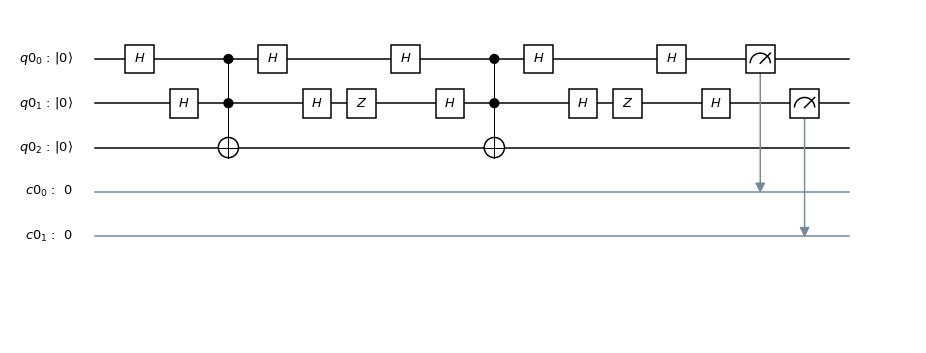

In [3]:
#inicializando os qubits e o bit
grover = qkit.QuantumCircuit(rq, rc)

#hadamard nos n primeiros qubits
grover.h(rq[0])
grover.h(rq[1])

# função de entrada (Uf)
grover.ccx(rq[0], rq[1], rq[2])

#hadamard nos n primeiros qubits
grover.h(rq[0])
grover.h(rq[1])

grover.z(rq[1])

#hadamard nos n primeiros qubits
grover.h(rq[0])
grover.h(rq[1])

# função de entrada (Uf)
grover.ccx(rq[0], rq[1], rq[2])

#hadamard nos n primeiros qubits
grover.h(rq[0])
grover.h(rq[1])

grover.z(rq[1])

#hadamard nos n primeiros qubits
grover.h(rq[0])
grover.h(rq[1])

#medição dos n qubits do topo 
grover.measure(rq[0], rc[0])
grover.measure(rq[1], rc[1])
circuit_drawer(grover)

### Simulação num Computador Clássico

{'status': <JobStatus.RUNNING: 'job is actively running'>, 'status_msg': None}
waiting 0 segundos


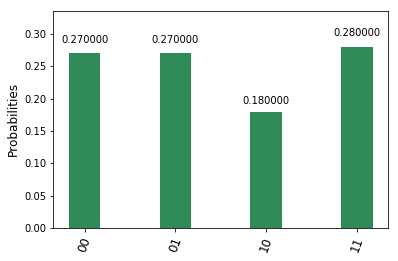

In [18]:
backend = "local_qasm_simulator"
shots = 100
job = qkit.execute(grover, backend=backend, shots=shots)
k = 0
wait_time = 1
while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
    
results_sim = job.result() 
outputs_sim = results_sim.get_counts()

plot_histogram(outputs_sim)

### Simulação num Computador Quântico

In [ ]:
backend = "ibmq_16_melbourne"
shots = 1000
job = qkit.execute(grover, backend=backend, shots=shots)
k = 0
wait_time = 10
while not job.done:
    print(job.status)
    print('waiting '+ str(k) + ' segundos' )
    k = k + wait_time
    time.sleep(wait_time)
    
results = job.result() 
outputs = results.get_counts()

plot_histogram(outputs)

## Conclusão

Logo, podemos concluir de todo o trabalho exposto, que o algoritmo de Grover tem um ganho de ordem quadrática em relação ao algoritmo clássico de busca em vetores não ordenados. Numa rápida comparação poderíamos citar como exemplo o algoritmo de busca binaria, que é mais eficiente que o algoritmo de Grover, mas para realizar a busca com ele teríamos de ordenar o vetor previamente, o que nos deixaria com uma complexidade de n.log(n) (Ordenação) x log(n) (Busca Binária), ou seja, basta a ordenação do vetor para termos uma complexidade maior que a busca desordenada, provando que o algoritmo de Grover é mais eficiente.

***
## Referências
Yanofsky, Noson S. and Mirco A. MannucciQuantum computing for computer scientists. Cambridge: Cambridge University Press, 2008.  
Nielsen, Michael A., and Isaac Chuang. "Quantum computation and quantum information." (2002): 558-559.